In [8]:
!pip install feature_engine

# MRMR(RFCQ) with Random Forest 

P=1:
 RF - DR=80.52%, FPR=0.19%, ACC=98.61%
 RF + mRMR - DR=82.22%, FPR=0.18%, ACC=98.65%
P=2:
 RF - DR=84.56%, FPR=0.16%, ACC=98.83%
 RF + mRMR - DR=86.77%, FPR=0.15%, ACC=98.85%
P=3:
 RF - DR=86.75%, FPR=0.14%, ACC=98.96%
 RF + mRMR - DR=89.14%, FPR=0.13%, ACC=99.04%
P=4:
 RF - DR=89.90%, FPR=0.12%, ACC=99.13%
 RF + mRMR - DR=91.10%, FPR=0.11%, ACC=99.16%
P=5:
 RF - DR=92.43%, FPR=0.10%, ACC=99.24%
 RF + mRMR - DR=93.30%, FPR=0.10%, ACC=99.29%
P=6:
 RF - DR=94.58%, FPR=0.08%, ACC=99.40%
 RF + mRMR - DR=94.99%, FPR=0.08%, ACC=99.44%


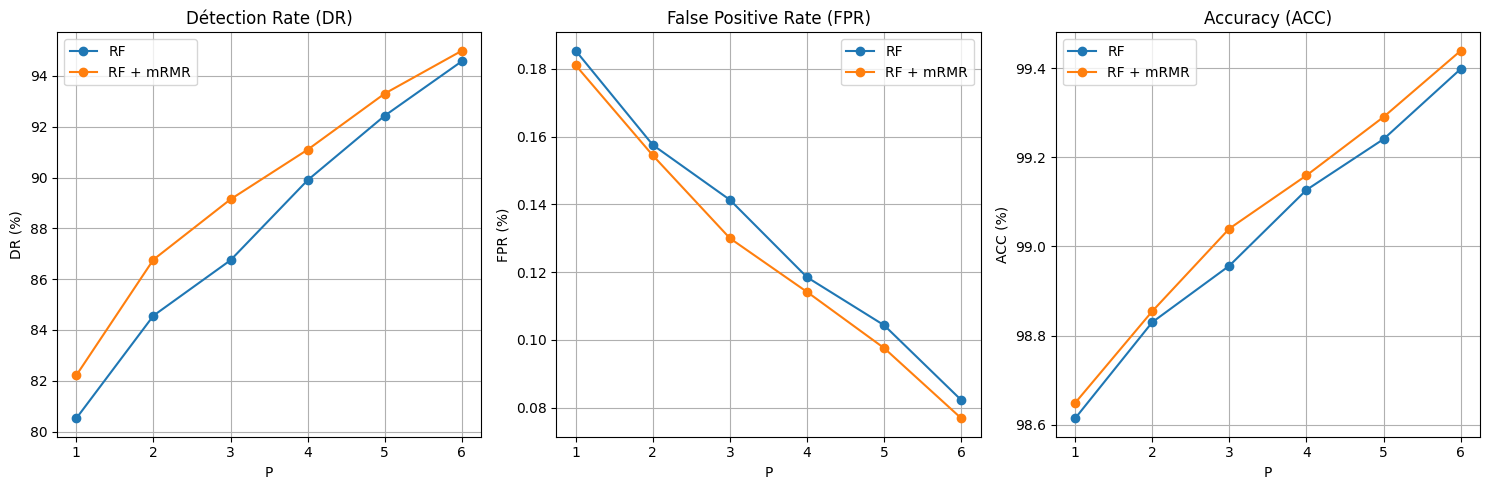

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from feature_engine.selection import MRMR
from sklearn.feature_selection import VarianceThreshold

def load_random_samples(filename, n_samples):
    df = pd.read_csv(filename)
    if len(df) < n_samples:
        raise ValueError(f"Not enough data in '{filename}': {len(df)} rows available, but {n_samples} required.")
    if len(df) > n_samples:
        return df.sample(n=n_samples, random_state=42)
    else:
        return df

# Chemins des dossiers
train_path = '/kaggle/input/ciciot2023/data/train'
test_path = '/kaggle/input/ciciot2023/data/test'

DR_list_RF = []
FPR_list_RF = []
ACC_list_RF = []
DR_list_mRMR = []
FPR_list_mRMR = []
ACC_list_mRMR = []
P_list = []  # Changed from sample_count_list to P_list

# Chargement des données de test
benign_test = pd.read_csv(os.path.join(test_path, 'Benign_test.csv')).drop(columns=['Label'], errors='ignore')
ddos_test = pd.read_csv(os.path.join(test_path, 'DDoS_test.csv')).drop(columns=['Label'], errors='ignore')
dos_test = pd.read_csv(os.path.join(test_path, 'DoS_test.csv')).drop(columns=['Label'], errors='ignore')
mirai_test = pd.read_csv(os.path.join(test_path, 'Mirai_test.csv')).drop(columns=['Label'], errors='ignore')
recon_test = pd.read_csv(os.path.join(test_path, 'Recon_test.csv')).drop(columns=['Label'], errors='ignore')
spoofing_test = pd.read_csv(os.path.join(test_path, 'Spoofing_test.csv')).drop(columns=['Label'], errors='ignore')
webbased_test = pd.read_csv(os.path.join(test_path, 'Web-based_test.csv')).drop(columns=['Label'], errors='ignore')
bruteforce_test = pd.read_csv(os.path.join(test_path, 'Brute_Force_test.csv')).drop(columns=['Label'], errors='ignore')

# Création des labels de test
benign_test_labels = np.zeros(len(benign_test), dtype=int)
ddos_test_labels = np.ones(len(ddos_test), dtype=int)
dos_test_labels = np.full(len(dos_test), 2, dtype=int)
mirai_test_labels = np.full(len(mirai_test), 3, dtype=int)
recon_test_labels = np.full(len(recon_test), 4, dtype=int)
spoofing_test_labels = np.full(len(spoofing_test), 5, dtype=int)
webbased_test_labels = np.full(len(webbased_test), 6, dtype=int)
bruteforce_test_labels = np.full(len(bruteforce_test), 7, dtype=int)

# Fusion des données de test
TestMatrix = pd.concat([
    benign_test, ddos_test, dos_test, mirai_test,
    recon_test, spoofing_test, webbased_test, bruteforce_test
], ignore_index=True)
TestLabels = np.concatenate([
    benign_test_labels, ddos_test_labels, dos_test_labels, mirai_test_labels,
    recon_test_labels, spoofing_test_labels, webbased_test_labels, bruteforce_test_labels
])

# Gestion des valeurs infinies et manquantes pour le test
TestMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
TestMatrix.fillna(TestMatrix.mean(), inplace=True)

# Boucle sur P de 1 à 6
for P in range(1, 7):
    # Chargement des données d'entraînement avec P actuel
    benign_train = load_random_samples(os.path.join(train_path, 'Benign_train.csv'), 7100*P).drop(columns=['Label'], errors='ignore')
    ddos_train = load_random_samples(os.path.join(train_path, 'DDoS_train.csv'), 8600*P).drop(columns=['Label'], errors='ignore')
    dos_train = load_random_samples(os.path.join(train_path, 'DoS_train.csv'), 4160*P).drop(columns=['Label'], errors='ignore')
    mirai_train = load_random_samples(os.path.join(train_path, 'Mirai_train.csv'),2000*P).drop(columns=['Label'], errors='ignore')
    recon_train = load_random_samples(os.path.join(train_path, 'Recon_train.csv'), 3000*P).drop(columns=['Label'], errors='ignore')
    spoofing_train = load_random_samples(os.path.join(train_path, 'Spoofing_train.csv'), 6600*P).drop(columns=['Label'], errors='ignore')
    webbased_train = load_random_samples(os.path.join(train_path, 'Web-based_train.csv'), 190*P).drop(columns=['Label'], errors='ignore')
    bruteforce_train = load_random_samples(os.path.join(train_path, 'Brute_Force_train.csv'), 173*P).drop(columns=['Label'], errors='ignore')
    
    # Création des labels d'entraînement
    benign_labels = np.zeros(len(benign_train), dtype=int)
    ddos_labels = np.ones(len(ddos_train), dtype=int)
    dos_labels = np.full(len(dos_train), 2, dtype=int)
    mirai_labels = np.full(len(mirai_train), 3, dtype=int)
    recon_labels = np.full(len(recon_train), 4, dtype=int)
    spoofing_labels = np.full(len(spoofing_train), 5, dtype=int)
    webbased_labels = np.full(len(webbased_train), 6, dtype=int)
    bruteforce_labels = np.full(len(bruteforce_train), 7, dtype=int)
    
    # Fusion des données d'entraînement
    TrainMatrix = pd.concat([
        benign_train, ddos_train, dos_train, mirai_train,
        recon_train, spoofing_train, webbased_train, bruteforce_train
    ], ignore_index=True)
    TrainLabels = np.concatenate([
        benign_labels, ddos_labels, dos_labels, mirai_labels,
        recon_labels, spoofing_labels, webbased_labels, bruteforce_labels
    ])
    
    # Gestion des valeurs infinies et manquantes pour l'entraînement
    TrainMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
    TrainMatrix.fillna(TrainMatrix.mean(), inplace=True)
    
    # Align columns between train and test
    common_columns = list(set(TrainMatrix.columns).intersection(set(TestMatrix.columns)))
    TrainMatrix = TrainMatrix[common_columns]
    TestMatrix_p = TestMatrix[common_columns]
    
    # Remove constant features (zero variance) from train, and apply to test copy
    vt = VarianceThreshold(threshold=0.0)
    vt.fit(TrainMatrix)
    columns_to_keep = TrainMatrix.columns[vt.get_support()]
    TrainMatrix = TrainMatrix[columns_to_keep]
    TestMatrix_p = TestMatrix_p[columns_to_keep]
    
    # --- Méthode Random Forest standard ---
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(TrainMatrix, TrainLabels)
    pred_labels = rf.predict(TestMatrix_p)
    
    # Calcul métriques pour RF standard
    conf_mat = confusion_matrix(TestLabels, pred_labels, labels=np.unique(TestLabels))
    TP = np.diag(conf_mat)
    FN = np.sum(conf_mat, axis=1) - TP
    FP = np.sum(conf_mat, axis=0) - TP
    TN = np.sum(conf_mat) - (TP + FP + FN)
    DR_RF = np.mean(TP / (TP + FN)) * 100
    FPR_RF = np.mean(FP / (FP + TN)) * 100
    ACC_RF = np.sum(TP) / np.sum(conf_mat) * 100
    
    # --- Méthode Random Forest avec mRMR (using RFCQ) ---
    sel = MRMR(
        variables=None, # Or list of specific feature names
        method='RFCQ', # Changed to 'RFCQ' for Random Forest-based relevance
        max_features=20, # Set to 20 as requested for feature selection
        scoring='accuracy', # For multi-class; consider 'f1_macro' for imbalance
        cv=5, # Balanced cross-validation
        regression=False,
        confirm_variables=False, # Set True if using variables
        random_state=42,
    )
    sel.fit(TrainMatrix, TrainLabels)
    TrainMatrix_sel = sel.transform(TrainMatrix)
    TestMatrix_sel = sel.transform(TestMatrix_p)
    
    rf_mrmr = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_mrmr.fit(TrainMatrix_sel, TrainLabels)
    pred_labels_mrmr = rf_mrmr.predict(TestMatrix_sel)
    
    # Calcul métriques pour RF avec mRMR
    conf_mat_mrmr = confusion_matrix(TestLabels, pred_labels_mrmr, labels=np.unique(TestLabels))
    TP_mrmr = np.diag(conf_mat_mrmr)
    FN_mrmr = np.sum(conf_mat_mrmr, axis=1) - TP_mrmr
    FP_mrmr = np.sum(conf_mat_mrmr, axis=0) - TP_mrmr
    TN_mrmr = np.sum(conf_mat_mrmr) - (TP_mrmr + FP_mrmr + FN_mrmr)
    DR_mRMR = np.mean(TP_mrmr / (TP_mrmr + FN_mrmr)) * 100
    FPR_mRMR = np.mean(FP_mrmr / (FP_mrmr + TN_mrmr)) * 100
    ACC_mRMR = np.sum(TP_mrmr) / np.sum(conf_mat_mrmr) * 100
    
    print(f"P={P}:")
    print(f" RF - DR={DR_RF:.2f}%, FPR={FPR_RF:.2f}%, ACC={ACC_RF:.2f}%")
    print(f" RF + mRMR - DR={DR_mRMR:.2f}%, FPR={FPR_mRMR:.2f}%, ACC={ACC_mRMR:.2f}%")
    
    # Sauvegarde des métriques
    DR_list_RF.append(DR_RF)
    FPR_list_RF.append(FPR_RF)
    ACC_list_RF.append(ACC_RF)
    DR_list_mRMR.append(DR_mRMR)
    FPR_list_mRMR.append(FPR_mRMR)
    ACC_list_mRMR.append(ACC_mRMR)
    P_list.append(P)  # Append P instead of len(TrainMatrix)

plt.figure(figsize=(15, 5))

# DR comparison
plt.subplot(1, 3, 1)
plt.plot(P_list, DR_list_RF, marker='o', label="RF")
plt.plot(P_list, DR_list_mRMR, marker='o', label="RF + mRMR")
plt.xlabel("P")
plt.ylabel("DR (%)")
plt.title("Détection Rate (DR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# FPR comparison
plt.subplot(1, 3, 2)
plt.plot(P_list, FPR_list_RF, marker='o', label="RF")
plt.plot(P_list, FPR_list_mRMR, marker='o', label="RF + mRMR")
plt.xlabel("P")
plt.ylabel("FPR (%)")
plt.title("False Positive Rate (FPR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# ACC comparison
plt.subplot(1, 3, 3)
plt.plot(P_list, ACC_list_RF, marker='o', label="RF")
plt.plot(P_list, ACC_list_mRMR, marker='o', label="RF + mRMR")
plt.xlabel("P")
plt.ylabel("ACC (%)")
plt.title("Accuracy (ACC)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

plt.tight_layout()
plt.show()

# MRMR(RFCQ) with Decision Tree

P=1:
 DT - DR=85.19%, FPR=0.20%, ACC=98.47%
 DT + mRMR - DR=84.88%, FPR=0.22%, ACC=98.38%
P=2:
 DT - DR=87.16%, FPR=0.18%, ACC=98.66%
 DT + mRMR - DR=87.03%, FPR=0.18%, ACC=98.63%
P=3:
 DT - DR=89.24%, FPR=0.15%, ACC=98.84%
 DT + mRMR - DR=88.85%, FPR=0.16%, ACC=98.80%
P=4:
 DT - DR=91.38%, FPR=0.14%, ACC=98.95%
 DT + mRMR - DR=91.24%, FPR=0.14%, ACC=98.95%
P=5:
 DT - DR=93.38%, FPR=0.12%, ACC=99.14%
 DT + mRMR - DR=92.94%, FPR=0.12%, ACC=99.11%
P=6:
 DT - DR=94.65%, FPR=0.10%, ACC=99.28%
 DT + mRMR - DR=94.50%, FPR=0.10%, ACC=99.28%


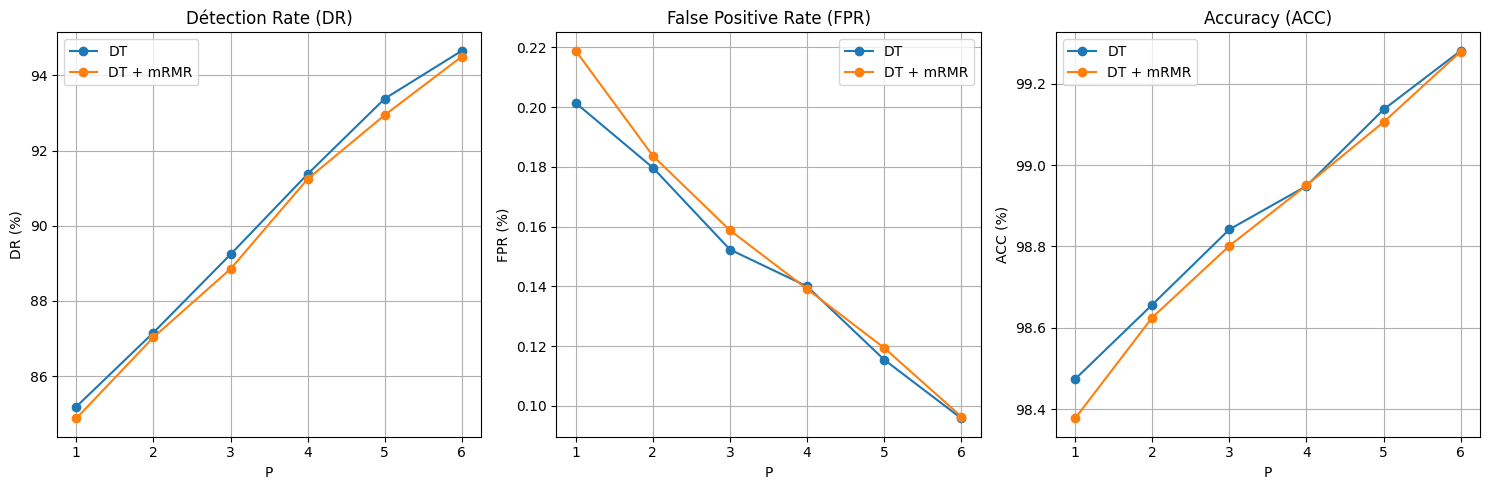

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from feature_engine.selection import MRMR
from sklearn.feature_selection import VarianceThreshold

def load_random_samples(filename, n_samples):
    df = pd.read_csv(filename)
    if len(df) < n_samples:
        raise ValueError(f"Not enough data in '{filename}': {len(df)} rows available, but {n_samples} required.")
    if len(df) > n_samples:
        return df.sample(n=n_samples, random_state=42)
    else:
        return df

# Chemins des dossiers
train_path = '/kaggle/input/ciciot2023/data/train'
test_path = '/kaggle/input/ciciot2023/data/test'

DR_list_DT = []
FPR_list_DT = []
ACC_list_DT = []
DR_list_mRMR = []
FPR_list_mRMR = []
ACC_list_mRMR = []
P_list = []  # Use P for x-axis

# Chargement des données de test
benign_test = pd.read_csv(os.path.join(test_path, 'Benign_test.csv')).drop(columns=['Label'], errors='ignore')
ddos_test = pd.read_csv(os.path.join(test_path, 'DDoS_test.csv')).drop(columns=['Label'], errors='ignore')
dos_test = pd.read_csv(os.path.join(test_path, 'DoS_test.csv')).drop(columns=['Label'], errors='ignore')
mirai_test = pd.read_csv(os.path.join(test_path, 'Mirai_test.csv')).drop(columns=['Label'], errors='ignore')
recon_test = pd.read_csv(os.path.join(test_path, 'Recon_test.csv')).drop(columns=['Label'], errors='ignore')
spoofing_test = pd.read_csv(os.path.join(test_path, 'Spoofing_test.csv')).drop(columns=['Label'], errors='ignore')
webbased_test = pd.read_csv(os.path.join(test_path, 'Web-based_test.csv')).drop(columns=['Label'], errors='ignore')
bruteforce_test = pd.read_csv(os.path.join(test_path, 'Brute_Force_test.csv')).drop(columns=['Label'], errors='ignore')

# Création des labels de test
benign_test_labels = np.zeros(len(benign_test), dtype=int)
ddos_test_labels = np.ones(len(ddos_test), dtype=int)
dos_test_labels = np.full(len(dos_test), 2, dtype=int)
mirai_test_labels = np.full(len(mirai_test), 3, dtype=int)
recon_test_labels = np.full(len(recon_test), 4, dtype=int)
spoofing_test_labels = np.full(len(spoofing_test), 5, dtype=int)
webbased_test_labels = np.full(len(webbased_test), 6, dtype=int)
bruteforce_test_labels = np.full(len(bruteforce_test), 7, dtype=int)

# Fusion des données de test
TestMatrix = pd.concat([
    benign_test, ddos_test, dos_test, mirai_test,
    recon_test, spoofing_test, webbased_test, bruteforce_test
], ignore_index=True)
TestLabels = np.concatenate([
    benign_test_labels, ddos_test_labels, dos_test_labels, mirai_test_labels,
    recon_test_labels, spoofing_test_labels, webbased_test_labels, bruteforce_test_labels
])

# Gestion des valeurs infinies et manquantes pour le test
TestMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
TestMatrix.fillna(TestMatrix.mean(), inplace=True)

for P in range(1, 7):
    # Chargement des données d'entraînement avec P actuel
    benign_train = load_random_samples(os.path.join(train_path, 'Benign_train.csv'), 7100*P).drop(columns=['Label'], errors='ignore')
    ddos_train = load_random_samples(os.path.join(train_path, 'DDoS_train.csv'), 8600*P).drop(columns=['Label'], errors='ignore')
    dos_train = load_random_samples(os.path.join(train_path, 'DoS_train.csv'), 4160*P).drop(columns=['Label'], errors='ignore')
    mirai_train = load_random_samples(os.path.join(train_path, 'Mirai_train.csv'),2000*P).drop(columns=['Label'], errors='ignore')
    recon_train = load_random_samples(os.path.join(train_path, 'Recon_train.csv'), 3000*P).drop(columns=['Label'], errors='ignore')
    spoofing_train = load_random_samples(os.path.join(train_path, 'Spoofing_train.csv'), 6600*P).drop(columns=['Label'], errors='ignore')
    webbased_train = load_random_samples(os.path.join(train_path, 'Web-based_train.csv'), 190*P).drop(columns=['Label'], errors='ignore')
    bruteforce_train = load_random_samples(os.path.join(train_path, 'Brute_Force_train.csv'), 173*P).drop(columns=['Label'], errors='ignore')
    
    # Création des labels d'entraînement
    benign_labels = np.zeros(len(benign_train), dtype=int)
    ddos_labels = np.ones(len(ddos_train), dtype=int)
    dos_labels = np.full(len(dos_train), 2, dtype=int)
    mirai_labels = np.full(len(mirai_train), 3, dtype=int)
    recon_labels = np.full(len(recon_train), 4, dtype=int)
    spoofing_labels = np.full(len(spoofing_train), 5, dtype=int)
    webbased_labels = np.full(len(webbased_train), 6, dtype=int)
    bruteforce_labels = np.full(len(bruteforce_train), 7, dtype=int)
    
    # Fusion des données d'entraînement
    TrainMatrix = pd.concat([
        benign_train, ddos_train, dos_train, mirai_train,
        recon_train, spoofing_train, webbased_train, bruteforce_train
    ], ignore_index=True)
    TrainLabels = np.concatenate([
        benign_labels, ddos_labels, dos_labels, mirai_labels,
        recon_labels, spoofing_labels, webbased_labels, bruteforce_labels
    ])
    
    # Gestion des valeurs infinies et manquantes pour l'entraînement
    TrainMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
    TrainMatrix.fillna(TrainMatrix.mean(), inplace=True)
    
    # Align columns between train and test
    common_columns = list(set(TrainMatrix.columns).intersection(set(TestMatrix.columns)))
    TrainMatrix = TrainMatrix[common_columns]
    TestMatrix_p = TestMatrix[common_columns]
    
    # Remove constant features (zero variance) from train, and apply to test copy
    vt = VarianceThreshold(threshold=0.0)
    vt.fit(TrainMatrix)
    columns_to_keep = TrainMatrix.columns[vt.get_support()]
    TrainMatrix = TrainMatrix[columns_to_keep]
    TestMatrix_p = TestMatrix_p[columns_to_keep]
    
    # --- Méthode Decision Tree standard ---
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(TrainMatrix, TrainLabels)
    pred_labels = dt.predict(TestMatrix_p)
    
    # Calcul métriques pour DT standard
    conf_mat = confusion_matrix(TestLabels, pred_labels, labels=np.unique(TestLabels))
    TP = np.diag(conf_mat)
    FN = np.sum(conf_mat, axis=1) - TP
    FP = np.sum(conf_mat, axis=0) - TP
    TN = np.sum(conf_mat) - (TP + FP + FN)
    DR_DT = np.mean(TP / (TP + FN)) * 100
    FPR_DT = np.mean(FP / (FP + TN)) * 100
    ACC_DT = np.sum(TP) / np.sum(conf_mat) * 100
    
    # --- Méthode Decision Tree avec mRMR (using RFCQ) ---
    sel = MRMR(
        variables=None, # Or list of specific feature names
        method='RFCQ', # Changed to 'RFCQ' for Random Forest-based relevance
        max_features=20, # Set to 20 as requested for feature selection
        scoring='accuracy', # For multi-class; consider 'f1_macro' for imbalance
        cv=5, # Balanced cross-validation
        regression=False,
        confirm_variables=False, # Set True if using variables
        random_state=42,
        n_jobs=-1 # Parallelize for speed
    )
    sel.fit(TrainMatrix, TrainLabels)
    TrainMatrix_sel = sel.transform(TrainMatrix)
    TestMatrix_sel = sel.transform(TestMatrix_p)
    
    dt_mrmr = DecisionTreeClassifier(random_state=42)
    dt_mrmr.fit(TrainMatrix_sel, TrainLabels)
    pred_labels_mrmr = dt_mrmr.predict(TestMatrix_sel)
    
    # Calcul métriques pour DT avec mRMR
    conf_mat_mrmr = confusion_matrix(TestLabels, pred_labels_mrmr, labels=np.unique(TestLabels))
    TP_mrmr = np.diag(conf_mat_mrmr)
    FN_mrmr = np.sum(conf_mat_mrmr, axis=1) - TP_mrmr
    FP_mrmr = np.sum(conf_mat_mrmr, axis=0) - TP_mrmr
    TN_mrmr = np.sum(conf_mat_mrmr) - (TP_mrmr + FP_mrmr + FN_mrmr)
    DR_mRMR = np.mean(TP_mrmr / (TP_mrmr + FN_mrmr)) * 100
    FPR_mRMR = np.mean(FP_mrmr / (FP_mrmr + TN_mrmr)) * 100
    ACC_mRMR = np.sum(TP_mrmr) / np.sum(conf_mat_mrmr) * 100
    
    print(f"P={P}:")
    print(f" DT - DR={DR_DT:.2f}%, FPR={FPR_DT:.2f}%, ACC={ACC_DT:.2f}%")
    print(f" DT + mRMR - DR={DR_mRMR:.2f}%, FPR={FPR_mRMR:.2f}%, ACC={ACC_mRMR:.2f}%")
    
    # Sauvegarde des métriques
    DR_list_DT.append(DR_DT)
    FPR_list_DT.append(FPR_DT)
    ACC_list_DT.append(ACC_DT)
    DR_list_mRMR.append(DR_mRMR)
    FPR_list_mRMR.append(FPR_mRMR)
    ACC_list_mRMR.append(ACC_mRMR)
    P_list.append(P)

plt.figure(figsize=(15, 5))

# DR comparison
plt.subplot(1, 3, 1)
plt.plot(P_list, DR_list_DT, marker='o', label="DT")
plt.plot(P_list, DR_list_mRMR, marker='o', label="DT + mRMR")
plt.xlabel("P")
plt.ylabel("DR (%)")
plt.title("Détection Rate (DR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# FPR comparison
plt.subplot(1, 3, 2)
plt.plot(P_list, FPR_list_DT, marker='o', label="DT")
plt.plot(P_list, FPR_list_mRMR, marker='o', label="DT + mRMR")
plt.xlabel("P")
plt.ylabel("FPR (%)")
plt.title("False Positive Rate (FPR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# ACC comparison
plt.subplot(1, 3, 3)
plt.plot(P_list, ACC_list_DT, marker='o', label="DT")
plt.plot(P_list, ACC_list_mRMR, marker='o', label="DT + mRMR")
plt.xlabel("P")
plt.ylabel("ACC (%)")
plt.title("Accuracy (ACC)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

plt.tight_layout()
plt.show()

# MRMR(RFCQ) with KNN

P=1:
 KNN - DR=71.66%, FPR=0.43%, ACC=96.80%
 KNN + mRMR - DR=71.52%, FPR=0.43%, ACC=96.78%
P=2:
 KNN - DR=73.36%, FPR=0.40%, ACC=97.02%
 KNN + mRMR - DR=73.31%, FPR=0.40%, ACC=97.02%
P=3:
 KNN - DR=74.62%, FPR=0.38%, ACC=97.16%
 KNN + mRMR - DR=74.61%, FPR=0.39%, ACC=97.16%
P=4:
 KNN - DR=75.54%, FPR=0.37%, ACC=97.28%
 KNN + mRMR - DR=75.54%, FPR=0.37%, ACC=97.28%
P=5:
 KNN - DR=76.01%, FPR=0.35%, ACC=97.37%
 KNN + mRMR - DR=76.00%, FPR=0.35%, ACC=97.37%
P=6:
 KNN - DR=76.64%, FPR=0.34%, ACC=97.43%
 KNN + mRMR - DR=76.64%, FPR=0.34%, ACC=97.43%


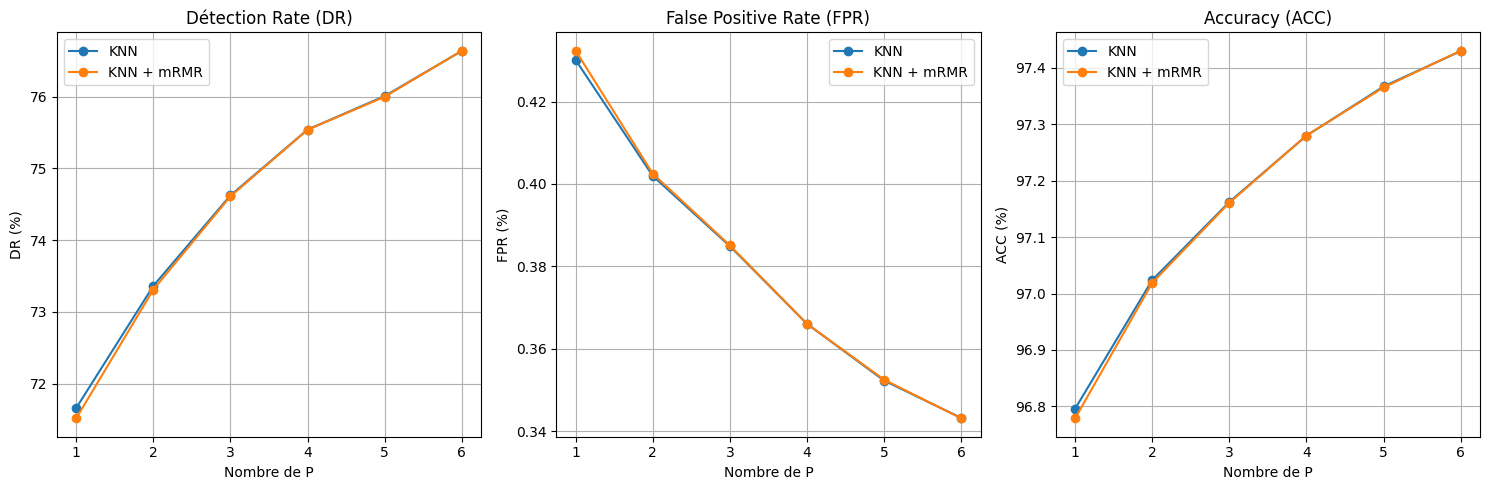

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from feature_engine.selection import MRMR
from sklearn.feature_selection import VarianceThreshold

def load_random_samples(filename, n_samples):
    df = pd.read_csv(filename)
    if len(df) < n_samples:
        raise ValueError(f"Not enough data in '{filename}': {len(df)} rows available, but {n_samples} required.")
    if len(df) > n_samples:
        return df.sample(n=n_samples, random_state=42)
    else:
        return df

# Chemins des dossiers
train_path = '/kaggle/input/ciciot2023/data/train'
test_path = '/kaggle/input/ciciot2023/data/test'

DR_list_KNN = []
FPR_list_KNN = []
ACC_list_KNN = []
DR_list_mRMR = []
FPR_list_mRMR = []
ACC_list_mRMR = []
P_list = []  # Use P for x-axis

# Chargement des données de test
benign_test = pd.read_csv(os.path.join(test_path, 'Benign_test.csv')).drop(columns=['Label'], errors='ignore')
ddos_test = pd.read_csv(os.path.join(test_path, 'DDoS_test.csv')).drop(columns=['Label'], errors='ignore')
dos_test = pd.read_csv(os.path.join(test_path, 'DoS_test.csv')).drop(columns=['Label'], errors='ignore')
mirai_test = pd.read_csv(os.path.join(test_path, 'Mirai_test.csv')).drop(columns=['Label'], errors='ignore')
recon_test = pd.read_csv(os.path.join(test_path, 'Recon_test.csv')).drop(columns=['Label'], errors='ignore')
spoofing_test = pd.read_csv(os.path.join(test_path, 'Spoofing_test.csv')).drop(columns=['Label'], errors='ignore')
webbased_test = pd.read_csv(os.path.join(test_path, 'Web-based_test.csv')).drop(columns=['Label'], errors='ignore')
bruteforce_test = pd.read_csv(os.path.join(test_path, 'Brute_Force_test.csv')).drop(columns=['Label'], errors='ignore')

# Création des labels de test
benign_test_labels = np.zeros(len(benign_test), dtype=int)
ddos_test_labels = np.ones(len(ddos_test), dtype=int)
dos_test_labels = np.full(len(dos_test), 2, dtype=int)
mirai_test_labels = np.full(len(mirai_test), 3, dtype=int)
recon_test_labels = np.full(len(recon_test), 4, dtype=int)
spoofing_test_labels = np.full(len(spoofing_test), 5, dtype=int)
webbased_test_labels = np.full(len(webbased_test), 6, dtype=int)
bruteforce_test_labels = np.full(len(bruteforce_test), 7, dtype=int)

# Fusion des données de test
TestMatrix = pd.concat([
    benign_test, ddos_test, dos_test, mirai_test,
    recon_test, spoofing_test, webbased_test, bruteforce_test
], ignore_index=True)
TestLabels = np.concatenate([
    benign_test_labels, ddos_test_labels, dos_test_labels, mirai_test_labels,
    recon_test_labels, spoofing_test_labels, webbased_test_labels, bruteforce_test_labels
])

# Gestion des valeurs infinies et manquantes pour le test
TestMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
TestMatrix.fillna(TestMatrix.mean(), inplace=True)

for P in range(1,7):
    # Chargement des données d'entraînement avec P actuel
    benign_train = load_random_samples(os.path.join(train_path, 'Benign_train.csv'), 7100*P).drop(columns=['Label'], errors='ignore')
    ddos_train = load_random_samples(os.path.join(train_path, 'DDoS_train.csv'), 8600*P).drop(columns=['Label'], errors='ignore')
    dos_train = load_random_samples(os.path.join(train_path, 'DoS_train.csv'), 4160*P).drop(columns=['Label'], errors='ignore')
    mirai_train = load_random_samples(os.path.join(train_path, 'Mirai_train.csv'),2000*P).drop(columns=['Label'], errors='ignore')
    recon_train = load_random_samples(os.path.join(train_path, 'Recon_train.csv'), 3000*P).drop(columns=['Label'], errors='ignore')
    spoofing_train = load_random_samples(os.path.join(train_path, 'Spoofing_train.csv'), 6600*P).drop(columns=['Label'], errors='ignore')
    webbased_train = load_random_samples(os.path.join(train_path, 'Web-based_train.csv'), 190*P).drop(columns=['Label'], errors='ignore')
    bruteforce_train = load_random_samples(os.path.join(train_path, 'Brute_Force_train.csv'), 173*P).drop(columns=['Label'], errors='ignore')
    
    # Création des labels d'entraînement
    benign_labels = np.zeros(len(benign_train), dtype=int)
    ddos_labels = np.ones(len(ddos_train), dtype=int)
    dos_labels = np.full(len(dos_train), 2, dtype=int)
    mirai_labels = np.full(len(mirai_train), 3, dtype=int)
    recon_labels = np.full(len(recon_train), 4, dtype=int)
    spoofing_labels = np.full(len(spoofing_train), 5, dtype=int)
    webbased_labels = np.full(len(webbased_train), 6, dtype=int)
    bruteforce_labels = np.full(len(bruteforce_train), 7, dtype=int)
    
    # Fusion des données d'entraînement
    TrainMatrix = pd.concat([
        benign_train, ddos_train, dos_train, mirai_train,
        recon_train, spoofing_train, webbased_train, bruteforce_train
    ], ignore_index=True)
    TrainLabels = np.concatenate([
        benign_labels, ddos_labels, dos_labels, mirai_labels,
        recon_labels, spoofing_labels, webbased_labels, bruteforce_labels
    ])
    
    # Gestion des valeurs infinies et manquantes pour l'entraînement
    TrainMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
    TrainMatrix.fillna(TrainMatrix.mean(), inplace=True)
    
    # Align columns between train and test
    common_columns = list(set(TrainMatrix.columns).intersection(set(TestMatrix.columns)))
    TrainMatrix = TrainMatrix[common_columns]
    TestMatrix_p = TestMatrix[common_columns]
    
    # Remove constant features (zero variance) from train, and apply to test copy
    vt = VarianceThreshold(threshold=0.0)
    vt.fit(TrainMatrix)
    columns_to_keep = TrainMatrix.columns[vt.get_support()]
    TrainMatrix = TrainMatrix[columns_to_keep]
    TestMatrix_p = TestMatrix_p[columns_to_keep]
    
    # --- Méthode KNN standard ---
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(TrainMatrix, TrainLabels)
    pred_labels = knn.predict(TestMatrix_p)
    
    # Calcul métriques pour KNN standard
    conf_mat = confusion_matrix(TestLabels, pred_labels, labels=np.unique(TestLabels))
    TP = np.diag(conf_mat)
    FN = np.sum(conf_mat, axis=1) - TP
    FP = np.sum(conf_mat, axis=0) - TP
    TN = np.sum(conf_mat) - (TP + FP + FN)
    DR_KNN = np.mean(TP / (TP + FN)) * 100
    FPR_KNN = np.mean(FP / (FP + TN)) * 100
    ACC_KNN = np.sum(TP) / np.sum(conf_mat) * 100
    
    # --- Méthode KNN avec mRMR (using RFCQ) ---
    sel = MRMR(
        variables=None, # Or list of specific feature names
        method='RFCQ', # Changed to 'RFCQ' for Random Forest-based relevance
        max_features=20, # Set to 20 as requested for feature selection
        scoring='accuracy', # For multi-class; consider 'f1_macro' for imbalance
        cv=5, # Balanced cross-validation
        regression=False,
        confirm_variables=False, # Set True if using variables
        random_state=42,
        n_jobs=-1 # Parallelize for speed
    )
    sel.fit(TrainMatrix, TrainLabels)
    TrainMatrix_sel = sel.transform(TrainMatrix)
    TestMatrix_sel = sel.transform(TestMatrix_p)
    
    knn_mrmr = KNeighborsClassifier(n_neighbors=8)
    knn_mrmr.fit(TrainMatrix_sel, TrainLabels)
    pred_labels_mrmr = knn_mrmr.predict(TestMatrix_sel)
    
    # Calcul métriques pour KNN avec mRMR
    conf_mat_mrmr = confusion_matrix(TestLabels, pred_labels_mrmr, labels=np.unique(TestLabels))
    TP_mrmr = np.diag(conf_mat_mrmr)
    FN_mrmr = np.sum(conf_mat_mrmr, axis=1) - TP_mrmr
    FP_mrmr = np.sum(conf_mat_mrmr, axis=0) - TP_mrmr
    TN_mrmr = np.sum(conf_mat_mrmr) - (TP_mrmr + FP_mrmr + FN_mrmr)
    DR_mRMR = np.mean(TP_mrmr / (TP_mrmr + FN_mrmr)) * 100
    FPR_mRMR = np.mean(FP_mrmr / (FP_mrmr + TN_mrmr)) * 100
    ACC_mRMR = np.sum(TP_mrmr) / np.sum(conf_mat_mrmr) * 100
    
    print(f"P={P}:")
    print(f" KNN - DR={DR_KNN:.2f}%, FPR={FPR_KNN:.2f}%, ACC={ACC_KNN:.2f}%")
    print(f" KNN + mRMR - DR={DR_mRMR:.2f}%, FPR={FPR_mRMR:.2f}%, ACC={ACC_mRMR:.2f}%")
    
    # Sauvegarde des métriques
    DR_list_KNN.append(DR_KNN)
    FPR_list_KNN.append(FPR_KNN)
    ACC_list_KNN.append(ACC_KNN)
    DR_list_mRMR.append(DR_mRMR)
    FPR_list_mRMR.append(FPR_mRMR)
    ACC_list_mRMR.append(ACC_mRMR)
    P_list.append(P)

plt.figure(figsize=(15, 5))

# DR comparison
plt.subplot(1, 3, 1)
plt.plot(P_list, DR_list_KNN, marker='o', label="KNN")
plt.plot(P_list, DR_list_mRMR, marker='o', label="KNN + mRMR")
plt.xlabel("Nombre de P")
plt.ylabel("DR (%)")
plt.title("Détection Rate (DR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# FPR comparison
plt.subplot(1, 3, 2)
plt.plot(P_list, FPR_list_KNN, marker='o', label="KNN")
plt.plot(P_list, FPR_list_mRMR, marker='o', label="KNN + mRMR")
plt.xlabel("Nombre de P")
plt.ylabel("FPR (%)")
plt.title("False Positive Rate (FPR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# ACC comparison
plt.subplot(1, 3, 3)
plt.plot(P_list, ACC_list_KNN, marker='o', label="KNN")
plt.plot(P_list, ACC_list_mRMR, marker='o', label="KNN + mRMR")
plt.xlabel("Nombre de P")
plt.ylabel("ACC (%)")
plt.title("Accuracy (ACC)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

plt.tight_layout()
plt.show()

# MRMR(RFCQ) with XGBoost 

P=1:
 XGB - DR=82.58%, FPR=0.16%, ACC=98.81%
 XGB + mRMR - DR=81.85%, FPR=0.17%, ACC=98.75%
P=2:
 XGB - DR=85.39%, FPR=0.14%, ACC=98.96%
 XGB + mRMR - DR=84.87%, FPR=0.14%, ACC=98.94%
P=3:
 XGB - DR=87.34%, FPR=0.13%, ACC=99.06%
 XGB + mRMR - DR=87.21%, FPR=0.13%, ACC=99.01%
P=4:
 XGB - DR=88.05%, FPR=0.12%, ACC=99.09%
 XGB + mRMR - DR=87.80%, FPR=0.13%, ACC=99.06%
P=5:
 XGB - DR=89.21%, FPR=0.12%, ACC=99.13%
 XGB + mRMR - DR=88.50%, FPR=0.12%, ACC=99.08%
P=6:
 XGB - DR=89.48%, FPR=0.11%, ACC=99.16%
 XGB + mRMR - DR=88.77%, FPR=0.12%, ACC=99.11%


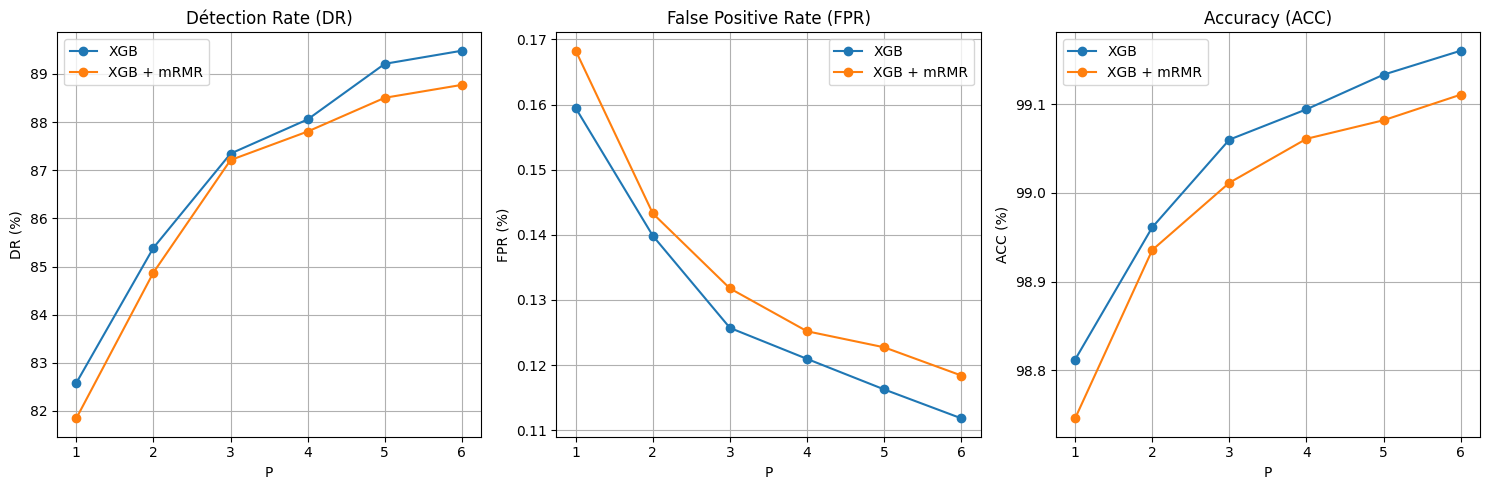

In [ ]:
import pandas as pd
import numpy as np
import os
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from feature_engine.selection import MRMR
from sklearn.feature_selection import VarianceThreshold

def load_random_samples(filename, n_samples):
    df = pd.read_csv(filename)
    if len(df) < n_samples:
        raise ValueError(f"Not enough data in '{filename}': {len(df)} rows available, but {n_samples} required.")
    if len(df) > n_samples:
        return df.sample(n=n_samples, random_state=42)
    else:
        return df

# Chemins des dossiers
train_path = '/kaggle/input/ciciot2023/data/train'
test_path = '/kaggle/input/ciciot2023/data/test'

DR_list_XGB = []
FPR_list_XGB = []
ACC_list_XGB = []
DR_list_mRMR = []
FPR_list_mRMR = []
ACC_list_mRMR = []
P_list = []  # Use P for x-axis

# Chargement des données de test
benign_test = pd.read_csv(os.path.join(test_path, 'Benign_test.csv')).drop(columns=['Label'], errors='ignore')
ddos_test = pd.read_csv(os.path.join(test_path, 'DDoS_test.csv')).drop(columns=['Label'], errors='ignore')
dos_test = pd.read_csv(os.path.join(test_path, 'DoS_test.csv')).drop(columns=['Label'], errors='ignore')
mirai_test = pd.read_csv(os.path.join(test_path, 'Mirai_test.csv')).drop(columns=['Label'], errors='ignore')
recon_test = pd.read_csv(os.path.join(test_path, 'Recon_test.csv')).drop(columns=['Label'], errors='ignore')
spoofing_test = pd.read_csv(os.path.join(test_path, 'Spoofing_test.csv')).drop(columns=['Label'], errors='ignore')
webbased_test = pd.read_csv(os.path.join(test_path, 'Web-based_test.csv')).drop(columns=['Label'], errors='ignore')
bruteforce_test = pd.read_csv(os.path.join(test_path, 'Brute_Force_test.csv')).drop(columns=['Label'], errors='ignore')

# Création des labels de test
benign_test_labels = np.zeros(len(benign_test), dtype=int)
ddos_test_labels = np.ones(len(ddos_test), dtype=int)
dos_test_labels = np.full(len(dos_test), 2, dtype=int)
mirai_test_labels = np.full(len(mirai_test), 3, dtype=int)
recon_test_labels = np.full(len(recon_test), 4, dtype=int)
spoofing_test_labels = np.full(len(spoofing_test), 5, dtype=int)
webbased_test_labels = np.full(len(webbased_test), 6, dtype=int)
bruteforce_test_labels = np.full(len(bruteforce_test), 7, dtype=int)

# Fusion des données de test
TestMatrix = pd.concat([
    benign_test, ddos_test, dos_test, mirai_test,
    recon_test, spoofing_test, webbased_test, bruteforce_test
], ignore_index=True)
TestLabels = np.concatenate([
    benign_test_labels, ddos_test_labels, dos_test_labels, mirai_test_labels,
    recon_test_labels, spoofing_test_labels, webbased_test_labels, bruteforce_test_labels
])

# Gestion des valeurs infinies et manquantes pour le test
TestMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
TestMatrix.fillna(TestMatrix.mean(), inplace=True)

for P in range(1, 7):
    # Chargement des données d'entraînement avec P actuel
    benign_train = load_random_samples(os.path.join(train_path, 'Benign_train.csv'), 7100*P).drop(columns=['Label'], errors='ignore')
    ddos_train = load_random_samples(os.path.join(train_path, 'DDoS_train.csv'), 8600*P).drop(columns=['Label'], errors='ignore')
    dos_train = load_random_samples(os.path.join(train_path, 'DoS_train.csv'), 4160*P).drop(columns=['Label'], errors='ignore')
    mirai_train = load_random_samples(os.path.join(train_path, 'Mirai_train.csv'),2000*P).drop(columns=['Label'], errors='ignore')
    recon_train = load_random_samples(os.path.join(train_path, 'Recon_train.csv'), 3000*P).drop(columns=['Label'], errors='ignore')
    spoofing_train = load_random_samples(os.path.join(train_path, 'Spoofing_train.csv'), 6600*P).drop(columns=['Label'], errors='ignore')
    webbased_train = load_random_samples(os.path.join(train_path, 'Web-based_train.csv'), 190*P).drop(columns=['Label'], errors='ignore')
    bruteforce_train = load_random_samples(os.path.join(train_path, 'Brute_Force_train.csv'), 173*P).drop(columns=['Label'], errors='ignore')
    
    # Création des labels d'entraînement
    benign_labels = np.zeros(len(benign_train), dtype=int)
    ddos_labels = np.ones(len(ddos_train), dtype=int)
    dos_labels = np.full(len(dos_train), 2, dtype=int)
    mirai_labels = np.full(len(mirai_train), 3, dtype=int)
    recon_labels = np.full(len(recon_train), 4, dtype=int)
    spoofing_labels = np.full(len(spoofing_train), 5, dtype=int)
    webbased_labels = np.full(len(webbased_train), 6, dtype=int)
    bruteforce_labels = np.full(len(bruteforce_train), 7, dtype=int)
    
    # Fusion des données d'entraînement
    TrainMatrix = pd.concat([
        benign_train, ddos_train, dos_train, mirai_train,
        recon_train, spoofing_train, webbased_train, bruteforce_train
    ], ignore_index=True)
    TrainLabels = np.concatenate([
        benign_labels, ddos_labels, dos_labels, mirai_labels,
        recon_labels, spoofing_labels, webbased_labels, bruteforce_labels
    ])
    
    # Gestion des valeurs infinies et manquantes pour l'entraînement
    TrainMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
    TrainMatrix.fillna(TrainMatrix.mean(), inplace=True)
    
    # Align columns between train and test
    common_columns = list(set(TrainMatrix.columns).intersection(set(TestMatrix.columns)))
    TrainMatrix = TrainMatrix[common_columns]
    TestMatrix_p = TestMatrix[common_columns]
    
    # Remove constant features (zero variance) from train, and apply to test copy
    vt = VarianceThreshold(threshold=0.0)
    vt.fit(TrainMatrix)
    columns_to_keep = TrainMatrix.columns[vt.get_support()]
    TrainMatrix = TrainMatrix[columns_to_keep]
    TestMatrix_p = TestMatrix_p[columns_to_keep]
    
    # --- Méthode XGBoost standard ---
    xgb = XGBClassifier(random_state=42)
    xgb.fit(TrainMatrix, TrainLabels)
    pred_labels = xgb.predict(TestMatrix_p)
    
    # Calcul métriques pour XGBoost standard
    conf_mat = confusion_matrix(TestLabels, pred_labels, labels=np.unique(TestLabels))
    TP = np.diag(conf_mat)
    FN = np.sum(conf_mat, axis=1) - TP
    FP = np.sum(conf_mat, axis=0) - TP
    TN = np.sum(conf_mat) - (TP + FP + FN)
    DR_XGB = np.mean(TP / (TP + FN)) * 100
    FPR_XGB = np.mean(FP / (FP + TN)) * 100
    ACC_XGB = np.sum(TP) / np.sum(conf_mat) * 100
    
    # --- Méthode XGBoost avec mRMR (using RFCQ) ---
    sel = MRMR(
        variables=None, # Or list of specific feature names
        method='RFCQ', # Changed to 'RFCQ' for Random Forest-based relevance
        max_features=20, # Set to 20 as requested for feature selection
        scoring='accuracy', # For multi-class; consider 'f1_macro' for imbalance
        cv=5, # Balanced cross-validation
        confirm_variables=False, # Set True if using variables
        random_state=42,
        n_jobs=-1 # Parallelize for speed
    )
    sel.fit(TrainMatrix, TrainLabels)
    TrainMatrix_sel = sel.transform(TrainMatrix)
    TestMatrix_sel = sel.transform(TestMatrix_p)
    
    xgb_mrmr = XGBClassifier(random_state=42)
    xgb_mrmr.fit(TrainMatrix_sel, TrainLabels)
    pred_labels_mrmr = xgb_mrmr.predict(TestMatrix_sel)
    
    # Calcul métriques pour XGBoost avec mRMR
    conf_mat_mrmr = confusion_matrix(TestLabels, pred_labels_mrmr, labels=np.unique(TestLabels))
    TP_mrmr = np.diag(conf_mat_mrmr)
    FN_mrmr = np.sum(conf_mat_mrmr, axis=1) - TP_mrmr
    FP_mrmr = np.sum(conf_mat_mrmr, axis=0) - TP_mrmr
    TN_mrmr = np.sum(conf_mat_mrmr) - (TP_mrmr + FP_mrmr + FN_mrmr)
    DR_mRMR = np.mean(TP_mrmr / (TP_mrmr + FN_mrmr)) * 100
    FPR_mRMR = np.mean(FP_mrmr / (FP_mrmr + TN_mrmr)) * 100
    ACC_mRMR = np.sum(TP_mrmr) / np.sum(conf_mat_mrmr) * 100
    
    print(f"P={P}:")
    print(f" XGB - DR={DR_XGB:.2f}%, FPR={FPR_XGB:.2f}%, ACC={ACC_XGB:.2f}%")
    print(f" XGB + mRMR - DR={DR_mRMR:.2f}%, FPR={FPR_mRMR:.2f}%, ACC={ACC_mRMR:.2f}%")
    
    # Sauvegarde des métriques
    DR_list_XGB.append(DR_XGB)
    FPR_list_XGB.append(FPR_XGB)
    ACC_list_XGB.append(ACC_XGB)
    DR_list_mRMR.append(DR_mRMR)
    FPR_list_mRMR.append(FPR_mRMR)
    ACC_list_mRMR.append(ACC_mRMR)
    P_list.append(P)

plt.figure(figsize=(15, 5))

# DR comparison
plt.subplot(1, 3, 1)
plt.plot(P_list, DR_list_XGB, marker='o', label="XGB")
plt.plot(P_list, DR_list_mRMR, marker='o', label="XGB + mRMR")
plt.xlabel("P")
plt.ylabel("DR (%)")
plt.title("Détection Rate (DR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# FPR comparison
plt.subplot(1, 3, 2)
plt.plot(P_list, FPR_list_XGB, marker='o', label="XGB")
plt.plot(P_list, FPR_list_mRMR, marker='o', label="XGB + mRMR")
plt.xlabel("P")
plt.ylabel("FPR (%)")
plt.title("False Positive Rate (FPR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# ACC comparison
plt.subplot(1, 3, 3)
plt.plot(P_list, ACC_list_XGB, marker='o', label="XGB")
plt.plot(P_list, ACC_list_mRMR, marker='o', label="XGB + mRMR")
plt.xlabel("P")
plt.ylabel("ACC (%)")
plt.title("Accuracy (ACC)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

plt.tight_layout()
plt.show()

# MRMR(RFCQ) with Logistic Regression

P=1:
 LR - DR=57.39%, FPR=4.56%, ACC=77.31%
 LR + mRMR - DR=54.34%, FPR=5.14%, ACC=72.17%
P=2:
 LR - DR=57.18%, FPR=4.64%, ACC=76.97%
 LR + mRMR - DR=54.11%, FPR=5.19%, ACC=72.43%
P=3:
 LR - DR=57.23%, FPR=4.62%, ACC=77.15%
 LR + mRMR - DR=54.11%, FPR=5.19%, ACC=72.53%
P=4:
 LR - DR=57.07%, FPR=4.67%, ACC=77.10%
 LR + mRMR - DR=53.97%, FPR=5.20%, ACC=72.77%
P=5:
 LR - DR=57.21%, FPR=4.64%, ACC=77.19%
 LR + mRMR - DR=54.02%, FPR=5.18%, ACC=72.84%
P=6:
 LR - DR=57.04%, FPR=4.66%, ACC=77.17%
 LR + mRMR - DR=54.06%, FPR=5.17%, ACC=72.89%


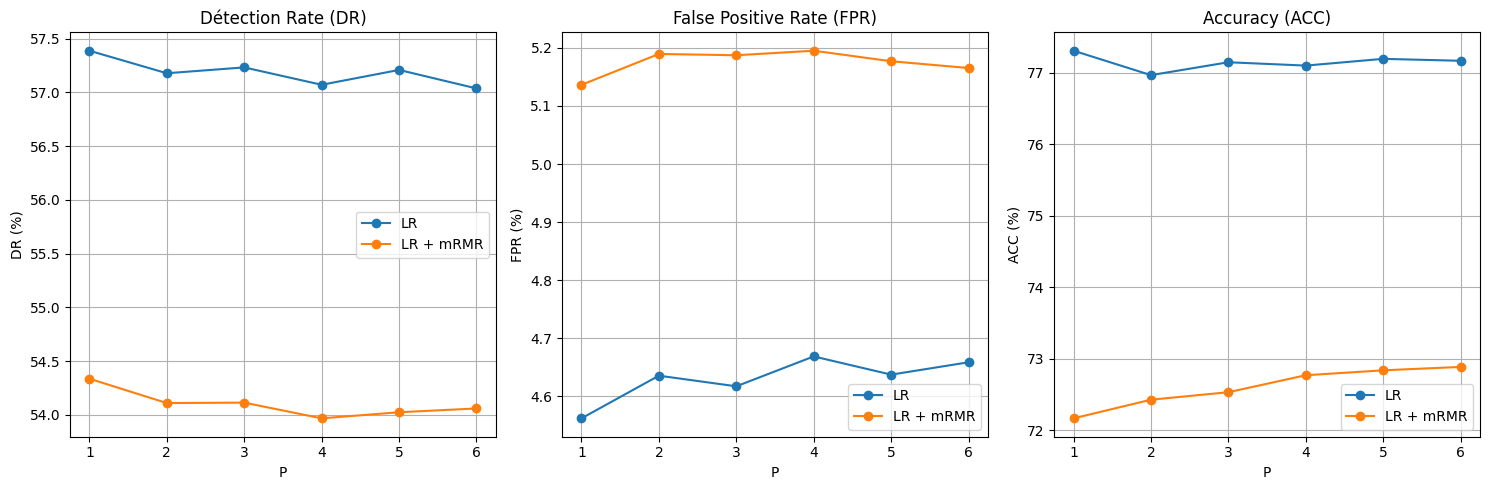

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from feature_engine.selection import MRMR
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

def load_random_samples(filename, n_samples):
    df = pd.read_csv(filename)
    if len(df) < n_samples:
        raise ValueError(f"Not enough data in '{filename}': {len(df)} rows available, but {n_samples} required.")
    if len(df) > n_samples:
        return df.sample(n=n_samples, random_state=42)
    else:
        return df

# Chemins des dossiers
train_path = '/kaggle/input/ciciot2023/data/train'
test_path = '/kaggle/input/ciciot2023/data/test'

DR_list_LR = []
FPR_list_LR = []
ACC_list_LR = []
DR_list_mRMR = []
FPR_list_mRMR = []
ACC_list_mRMR = []
P_list = [] # Changed from sample_count_list to P_list

# Chargement des données de test
benign_test = pd.read_csv(os.path.join(test_path, 'Benign_test.csv')).drop(columns=['Label'], errors='ignore')
ddos_test = pd.read_csv(os.path.join(test_path, 'DDoS_test.csv')).drop(columns=['Label'], errors='ignore')
dos_test = pd.read_csv(os.path.join(test_path, 'DoS_test.csv')).drop(columns=['Label'], errors='ignore')
mirai_test = pd.read_csv(os.path.join(test_path, 'Mirai_test.csv')).drop(columns=['Label'], errors='ignore')
recon_test = pd.read_csv(os.path.join(test_path, 'Recon_test.csv')).drop(columns=['Label'], errors='ignore')
spoofing_test = pd.read_csv(os.path.join(test_path, 'Spoofing_test.csv')).drop(columns=['Label'], errors='ignore')
webbased_test = pd.read_csv(os.path.join(test_path, 'Web-based_test.csv')).drop(columns=['Label'], errors='ignore')
bruteforce_test = pd.read_csv(os.path.join(test_path, 'Brute_Force_test.csv')).drop(columns=['Label'], errors='ignore')

# Création des labels de test
benign_test_labels = np.zeros(len(benign_test), dtype=int)
ddos_test_labels = np.ones(len(ddos_test), dtype=int)
dos_test_labels = np.full(len(dos_test), 2, dtype=int)
mirai_test_labels = np.full(len(mirai_test), 3, dtype=int)
recon_test_labels = np.full(len(recon_test), 4, dtype=int)
spoofing_test_labels = np.full(len(spoofing_test), 5, dtype=int)
webbased_test_labels = np.full(len(webbased_test), 6, dtype=int)
bruteforce_test_labels = np.full(len(bruteforce_test), 7, dtype=int)

# Fusion des données de test
TestMatrix = pd.concat([
    benign_test, ddos_test, dos_test, mirai_test,
    recon_test, spoofing_test, webbased_test, bruteforce_test
], ignore_index=True)
TestLabels = np.concatenate([
    benign_test_labels, ddos_test_labels, dos_test_labels, mirai_test_labels,
    recon_test_labels, spoofing_test_labels, webbased_test_labels, bruteforce_test_labels
])

# Gestion des valeurs infinies et manquantes pour le test
TestMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
TestMatrix.fillna(TestMatrix.mean(), inplace=True)

# Boucle sur P de 1 à 6
for P in range(1, 7):
    # Chargement des données d'entraînement avec P actuel
    benign_train = load_random_samples(os.path.join(train_path, 'Benign_train.csv'), 7100*P).drop(columns=['Label'], errors='ignore')
    ddos_train = load_random_samples(os.path.join(train_path, 'DDoS_train.csv'), 8600*P).drop(columns=['Label'], errors='ignore')
    dos_train = load_random_samples(os.path.join(train_path, 'DoS_train.csv'), 4160*P).drop(columns=['Label'], errors='ignore')
    mirai_train = load_random_samples(os.path.join(train_path, 'Mirai_train.csv'),2000*P).drop(columns=['Label'], errors='ignore')
    recon_train = load_random_samples(os.path.join(train_path, 'Recon_train.csv'), 3000*P).drop(columns=['Label'], errors='ignore')
    spoofing_train = load_random_samples(os.path.join(train_path, 'Spoofing_train.csv'), 6600*P).drop(columns=['Label'], errors='ignore')
    webbased_train = load_random_samples(os.path.join(train_path, 'Web-based_train.csv'), 190*P).drop(columns=['Label'], errors='ignore')
    bruteforce_train = load_random_samples(os.path.join(train_path, 'Brute_Force_train.csv'), 173*P).drop(columns=['Label'], errors='ignore')
  
    # Création des labels d'entraînement
    benign_labels = np.zeros(len(benign_train), dtype=int)
    ddos_labels = np.ones(len(ddos_train), dtype=int)
    dos_labels = np.full(len(dos_train), 2, dtype=int)
    mirai_labels = np.full(len(mirai_train), 3, dtype=int)
    recon_labels = np.full(len(recon_train), 4, dtype=int)
    spoofing_labels = np.full(len(spoofing_train), 5, dtype=int)
    webbased_labels = np.full(len(webbased_train), 6, dtype=int)
    bruteforce_labels = np.full(len(bruteforce_train), 7, dtype=int)
  
    # Fusion des données d'entraînement
    TrainMatrix = pd.concat([
        benign_train, ddos_train, dos_train, mirai_train,
        recon_train, spoofing_train, webbased_train, bruteforce_train
    ], ignore_index=True)
    TrainLabels = np.concatenate([
        benign_labels, ddos_labels, dos_labels, mirai_labels,
        recon_labels, spoofing_labels, webbased_labels, bruteforce_labels
    ])
  
    # Gestion des valeurs infinies et manquantes pour l'entraînement
    TrainMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
    TrainMatrix.fillna(TrainMatrix.mean(), inplace=True)
  
    # Align columns between train and test
    common_columns = list(set(TrainMatrix.columns).intersection(set(TestMatrix.columns)))
    TrainMatrix = TrainMatrix[common_columns]
    TestMatrix_p = TestMatrix[common_columns]
  
    # Remove constant features (zero variance) from train, and apply to test copy
    vt = VarianceThreshold(threshold=0.0)
    vt.fit(TrainMatrix)
    columns_to_keep = TrainMatrix.columns[vt.get_support()]
    TrainMatrix = TrainMatrix[columns_to_keep]
    TestMatrix_p = TestMatrix_p[columns_to_keep]

    # Scale the data
    scaler = StandardScaler()
    TrainMatrix = pd.DataFrame(scaler.fit_transform(TrainMatrix), columns=TrainMatrix.columns)
    TestMatrix_p = pd.DataFrame(scaler.transform(TestMatrix_p), columns=TestMatrix_p.columns)
  
    # --- Méthode Logistic Regression standard ---
    rf = LogisticRegression(random_state=42, max_iter=1000)
    rf.fit(TrainMatrix, TrainLabels)
    pred_labels = rf.predict(TestMatrix_p)
  
    # Calcul métriques pour LR standard
    conf_mat = confusion_matrix(TestLabels, pred_labels, labels=np.unique(TestLabels))
    TP = np.diag(conf_mat)
    FN = np.sum(conf_mat, axis=1) - TP
    FP = np.sum(conf_mat, axis=0) - TP
    TN = np.sum(conf_mat) - (TP + FP + FN)
    DR_LR = np.mean(TP / (TP + FN)) * 100
    FPR_LR = np.mean(FP / (FP + TN)) * 100
    ACC_LR = np.sum(TP) / np.sum(conf_mat) * 100
  
    # --- Méthode Logistic Regression avec mRMR (using FCQ) ---
    sel = MRMR(
        variables=None, # Or list of specific feature names
        method='FCQ', # Changed to 'FCQ' for F-statistic based relevance
        max_features=20, # Set to 20 as requested for feature selection
        scoring='accuracy', # For multi-class; consider 'f1_macro' for imbalance
        cv=5, # Balanced cross-validation
        regression=False,
        confirm_variables=False, # Set True if using variables
        random_state=42,
    )
    sel.fit(TrainMatrix, TrainLabels)
    TrainMatrix_sel = sel.transform(TrainMatrix)
    TestMatrix_sel = sel.transform(TestMatrix_p)
  
    rf_mrmr = LogisticRegression(random_state=42, max_iter=1000)
    rf_mrmr.fit(TrainMatrix_sel, TrainLabels)
    pred_labels_mrmr = rf_mrmr.predict(TestMatrix_sel)
  
    # Calcul métriques pour LR avec mRMR
    conf_mat_mrmr = confusion_matrix(TestLabels, pred_labels_mrmr, labels=np.unique(TestLabels))
    TP_mrmr = np.diag(conf_mat_mrmr)
    FN_mrmr = np.sum(conf_mat_mrmr, axis=1) - TP_mrmr
    FP_mrmr = np.sum(conf_mat_mrmr, axis=0) - TP_mrmr
    TN_mrmr = np.sum(conf_mat_mrmr) - (TP_mrmr + FP_mrmr + FN_mrmr)
    DR_mRMR = np.mean(TP_mrmr / (TP_mrmr + FN_mrmr)) * 100
    FPR_mRMR = np.mean(FP_mrmr / (FP_mrmr + TN_mrmr)) * 100
    ACC_mRMR = np.sum(TP_mrmr) / np.sum(conf_mat_mrmr) * 100
  
    print(f"P={P}:")
    print(f" LR - DR={DR_LR:.2f}%, FPR={FPR_LR:.2f}%, ACC={ACC_LR:.2f}%")
    print(f" LR + mRMR - DR={DR_mRMR:.2f}%, FPR={FPR_mRMR:.2f}%, ACC={ACC_mRMR:.2f}%")
  
    # Sauvegarde des métriques
    DR_list_LR.append(DR_LR)
    FPR_list_LR.append(FPR_LR)
    ACC_list_LR.append(ACC_LR)
    DR_list_mRMR.append(DR_mRMR)
    FPR_list_mRMR.append(FPR_mRMR)
    ACC_list_mRMR.append(ACC_mRMR)
    P_list.append(P) # Append P instead of len(TrainMatrix)

plt.figure(figsize=(15, 5))
# DR comparison
plt.subplot(1, 3, 1)
plt.plot(P_list, DR_list_LR, marker='o', label="LR")
plt.plot(P_list, DR_list_mRMR, marker='o', label="LR + mRMR")
plt.xlabel("P")
plt.ylabel("DR (%)")
plt.title("Détection Rate (DR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))
# FPR comparison
plt.subplot(1, 3, 2)
plt.plot(P_list, FPR_list_LR, marker='o', label="LR")
plt.plot(P_list, FPR_list_mRMR, marker='o', label="LR + mRMR")
plt.xlabel("P")
plt.ylabel("FPR (%)")
plt.title("False Positive Rate (FPR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))
# ACC comparison
plt.subplot(1, 3, 3)
plt.plot(P_list, ACC_list_LR, marker='o', label="LR")
plt.plot(P_list, ACC_list_mRMR, marker='o', label="LR + mRMR")
plt.xlabel("P")
plt.ylabel("ACC (%)")
plt.title("Accuracy (ACC)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))
plt.tight_layout()
plt.show()

# MRMR(RFCQ) with SVM


P=1:
 SVM - DR=34.61%, FPR=8.16%, ACC=63.64%
 SVM + mRMR - DR=25.27%, FPR=10.38%, ACC=53.24%
P=2:
 SVM - DR=34.80%, FPR=8.16%, ACC=63.43%
 SVM + mRMR - DR=25.13%, FPR=10.38%, ACC=52.66%
P=3:
 SVM - DR=35.67%, FPR=8.10%, ACC=63.71%
 SVM + mRMR - DR=34.41%, FPR=8.14%, ACC=63.57%
P=4:
 SVM - DR=34.99%, FPR=8.17%, ACC=63.27%
 SVM + mRMR - DR=27.21%, FPR=10.45%, ACC=53.53%
P=5:
 SVM - DR=35.53%, FPR=8.12%, ACC=63.82%
 SVM + mRMR - DR=35.26%, FPR=8.15%, ACC=63.60%
P=6:
 SVM - DR=34.90%, FPR=8.17%, ACC=63.97%
 SVM + mRMR - DR=35.30%, FPR=8.17%, ACC=64.07%


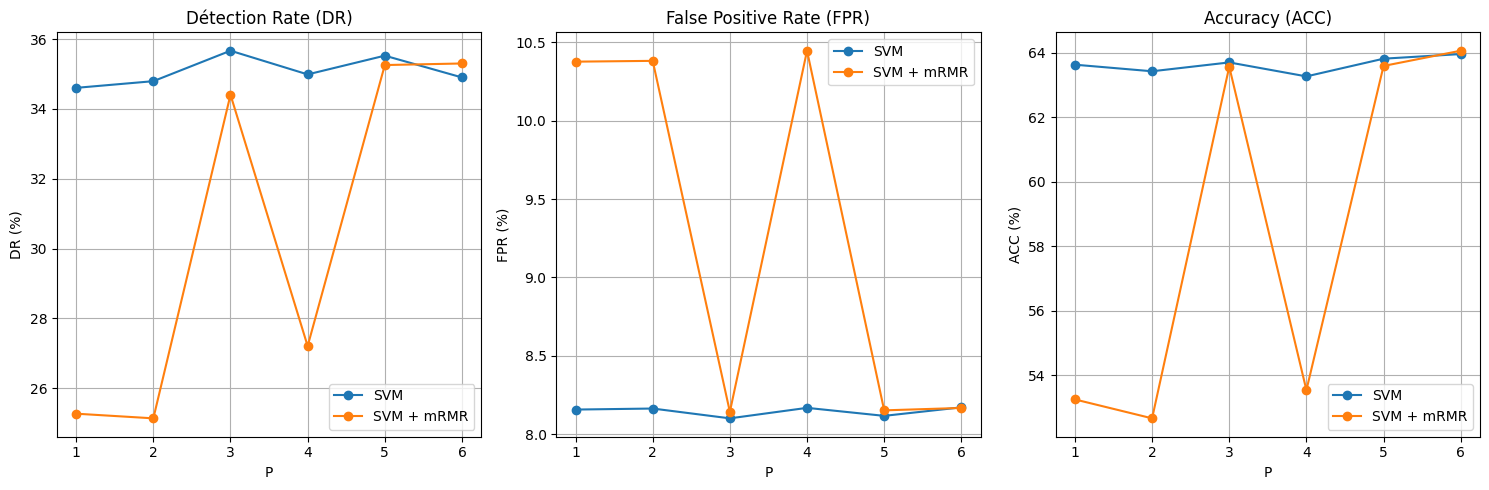

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from feature_engine.selection import MRMR
from sklearn.feature_selection import VarianceThreshold

def load_random_samples(filename, n_samples):
    df = pd.read_csv(filename)
    if len(df) < n_samples:
        raise ValueError(f"Not enough data in '{filename}': {len(df)} rows available, but {n_samples} required.")
    if len(df) > n_samples:
        return df.sample(n=n_samples, random_state=42)
    else:
        return df

# Chemins des dossiers
train_path = '/kaggle/input/ciciot2023/data/train'
test_path = '/kaggle/input/ciciot2023/data/test'

DR_list_SVM = []
FPR_list_SVM = []
ACC_list_SVM = []
DR_list_mRMR = []
FPR_list_mRMR = []
ACC_list_mRMR = []
P_list = []  # Use P for x-axis

# Chargement des données de test
benign_test = pd.read_csv(os.path.join(test_path, 'Benign_test.csv')).drop(columns=['Label'], errors='ignore')
ddos_test = pd.read_csv(os.path.join(test_path, 'DDoS_test.csv')).drop(columns=['Label'], errors='ignore')
dos_test = pd.read_csv(os.path.join(test_path, 'DoS_test.csv')).drop(columns=['Label'], errors='ignore')
mirai_test = pd.read_csv(os.path.join(test_path, 'Mirai_test.csv')).drop(columns=['Label'], errors='ignore')
recon_test = pd.read_csv(os.path.join(test_path, 'Recon_test.csv')).drop(columns=['Label'], errors='ignore')
spoofing_test = pd.read_csv(os.path.join(test_path, 'Spoofing_test.csv')).drop(columns=['Label'], errors='ignore')
webbased_test = pd.read_csv(os.path.join(test_path, 'Web-based_test.csv')).drop(columns=['Label'], errors='ignore')
bruteforce_test = pd.read_csv(os.path.join(test_path, 'Brute_Force_test.csv')).drop(columns=['Label'], errors='ignore')

# Création des labels de test
benign_test_labels = np.zeros(len(benign_test), dtype=int)
ddos_test_labels = np.ones(len(ddos_test), dtype=int)
dos_test_labels = np.full(len(dos_test), 2, dtype=int)
mirai_test_labels = np.full(len(mirai_test), 3, dtype=int)
recon_test_labels = np.full(len(recon_test), 4, dtype=int)
spoofing_test_labels = np.full(len(spoofing_test), 5, dtype=int)
webbased_test_labels = np.full(len(webbased_test), 6, dtype=int)
bruteforce_test_labels = np.full(len(bruteforce_test), 7, dtype=int)

# Fusion des données de test
TestMatrix = pd.concat([
    benign_test, ddos_test, dos_test, mirai_test,
    recon_test, spoofing_test, webbased_test, bruteforce_test
], ignore_index=True)
TestLabels = np.concatenate([
    benign_test_labels, ddos_test_labels, dos_test_labels, mirai_test_labels,
    recon_test_labels, spoofing_test_labels, webbased_test_labels, bruteforce_test_labels
])

# Gestion des valeurs infinies et manquantes pour le test
TestMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
TestMatrix.fillna(TestMatrix.mean(), inplace=True)

for P in range(1,7):
    # Chargement des données d'entraînement avec P actuel
    benign_train = load_random_samples(os.path.join(train_path, 'Benign_train.csv'), 7100*P).drop(columns=['Label'], errors='ignore')
    ddos_train = load_random_samples(os.path.join(train_path, 'DDoS_train.csv'), 8600*P).drop(columns=['Label'], errors='ignore')
    dos_train = load_random_samples(os.path.join(train_path, 'DoS_train.csv'), 4160*P).drop(columns=['Label'], errors='ignore')
    mirai_train = load_random_samples(os.path.join(train_path, 'Mirai_train.csv'),2000*P).drop(columns=['Label'], errors='ignore')
    recon_train = load_random_samples(os.path.join(train_path, 'Recon_train.csv'), 3000*P).drop(columns=['Label'], errors='ignore')
    spoofing_train = load_random_samples(os.path.join(train_path, 'Spoofing_train.csv'), 6600*P).drop(columns=['Label'], errors='ignore')
    webbased_train = load_random_samples(os.path.join(train_path, 'Web-based_train.csv'), 190*P).drop(columns=['Label'], errors='ignore')
    bruteforce_train = load_random_samples(os.path.join(train_path, 'Brute_Force_train.csv'), 173*P).drop(columns=['Label'], errors='ignore')
    
    # Création des labels d'entraînement
    benign_labels = np.zeros(len(benign_train), dtype=int)
    ddos_labels = np.ones(len(ddos_train), dtype=int)
    dos_labels = np.full(len(dos_train), 2, dtype=int)
    mirai_labels = np.full(len(mirai_train), 3, dtype=int)
    recon_labels = np.full(len(recon_train), 4, dtype=int)
    spoofing_labels = np.full(len(spoofing_train), 5, dtype=int)
    webbased_labels = np.full(len(webbased_train), 6, dtype=int)
    bruteforce_labels = np.full(len(bruteforce_train), 7, dtype=int)
    
    # Fusion des données d'entraînement
    TrainMatrix = pd.concat([
        benign_train, ddos_train, dos_train, mirai_train,
        recon_train, spoofing_train, webbased_train, bruteforce_train
    ], ignore_index=True)
    TrainLabels = np.concatenate([
        benign_labels, ddos_labels, dos_labels, mirai_labels,
        recon_labels, spoofing_labels, webbased_labels, bruteforce_labels
    ])
    
    # Gestion des valeurs infinies et manquantes pour l'entraînement
    TrainMatrix.replace([np.inf, -np.inf], np.nan, inplace=True)
    TrainMatrix.fillna(TrainMatrix.mean(), inplace=True)
    
    # Align columns between train and test
    common_columns = list(set(TrainMatrix.columns).intersection(set(TestMatrix.columns)))
    TrainMatrix = TrainMatrix[common_columns]
    TestMatrix_p = TestMatrix[common_columns]
    
    # Remove constant features (zero variance) from train, and apply to test copy
    vt = VarianceThreshold(threshold=0.0)
    vt.fit(TrainMatrix)
    columns_to_keep = TrainMatrix.columns[vt.get_support()]
    TrainMatrix = TrainMatrix[columns_to_keep]
    TestMatrix_p = TestMatrix_p[columns_to_keep]
    
    # --- Méthode SVM standard ---
    svm = LinearSVC(class_weight='balanced', random_state=42, dual=False, max_iter=10000)
    svm.fit(TrainMatrix, TrainLabels)
    pred_labels = svm.predict(TestMatrix_p)
    
    # Calcul métriques pour SVM standard
    conf_mat = confusion_matrix(TestLabels, pred_labels, labels=np.unique(TestLabels))
    TP = np.diag(conf_mat)
    FN = np.sum(conf_mat, axis=1) - TP
    FP = np.sum(conf_mat, axis=0) - TP
    TN = np.sum(conf_mat) - (TP + FP + FN)
    DR_SVM = np.mean(TP / (TP + FN)) * 100
    FPR_SVM = np.mean(FP / (FP + TN)) * 100
    ACC_SVM = np.sum(TP) / np.sum(conf_mat) * 100
    
    # --- Méthode SVM avec mRMR (using RFCQ) ---
    sel = MRMR(
        variables=None, # Or list of specific feature names
        method='RFCQ', # Changed to 'RFCQ' for Random Forest-based relevance
        max_features=20, # Set to 20 as requested for feature selection
        scoring='accuracy', # For multi-class; consider 'f1_macro' for imbalance
        cv=5, # Balanced cross-validation
        regression=False,
        confirm_variables=False, # Set True if using variables
        random_state=42,
        n_jobs=-1 # Parallelize for speed
    )
    sel.fit(TrainMatrix, TrainLabels)
    TrainMatrix_sel = sel.transform(TrainMatrix)
    TestMatrix_sel = sel.transform(TestMatrix_p)
    
    svm_mrmr = LinearSVC(class_weight='balanced', random_state=42, dual=False, max_iter=10000)
    svm_mrmr.fit(TrainMatrix_sel, TrainLabels)
    pred_labels_mrmr = svm_mrmr.predict(TestMatrix_sel)
    
    # Calcul métriques pour SVM avec mRMR
    conf_mat_mrmr = confusion_matrix(TestLabels, pred_labels_mrmr, labels=np.unique(TestLabels))
    TP_mrmr = np.diag(conf_mat_mrmr)
    FN_mrmr = np.sum(conf_mat_mrmr, axis=1) - TP_mrmr
    FP_mrmr = np.sum(conf_mat_mrmr, axis=0) - TP_mrmr
    TN_mrmr = np.sum(conf_mat_mrmr) - (TP_mrmr + FP_mrmr + FN_mrmr)
    DR_mRMR = np.mean(TP_mrmr / (TP_mrmr + FN_mrmr)) * 100
    FPR_mRMR = np.mean(FP_mrmr / (FP_mrmr + TN_mrmr)) * 100
    ACC_mRMR = np.sum(TP_mrmr) / np.sum(conf_mat_mrmr) * 100
    
    print(f"P={P}:")
    print(f" SVM - DR={DR_SVM:.2f}%, FPR={FPR_SVM:.2f}%, ACC={ACC_SVM:.2f}%")
    print(f" SVM + mRMR - DR={DR_mRMR:.2f}%, FPR={FPR_mRMR:.2f}%, ACC={ACC_mRMR:.2f}%")
    
    # Sauvegarde des métriques
    DR_list_SVM.append(DR_SVM)
    FPR_list_SVM.append(FPR_SVM)
    ACC_list_SVM.append(ACC_SVM)
    DR_list_mRMR.append(DR_mRMR)
    FPR_list_mRMR.append(FPR_mRMR)
    ACC_list_mRMR.append(ACC_mRMR)
    P_list.append(P)

plt.figure(figsize=(15, 5))

# DR comparison
plt.subplot(1, 3, 1)
plt.plot(P_list, DR_list_SVM, marker='o', label="SVM")
plt.plot(P_list, DR_list_mRMR, marker='o', label="SVM + mRMR")
plt.xlabel("P")
plt.ylabel("DR (%)")
plt.title("Détection Rate (DR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# FPR comparison
plt.subplot(1, 3, 2)
plt.plot(P_list, FPR_list_SVM, marker='o', label="SVM")
plt.plot(P_list, FPR_list_mRMR, marker='o', label="SVM + mRMR")
plt.xlabel("P")
plt.ylabel("FPR (%)")
plt.title("False Positive Rate (FPR)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

# ACC comparison
plt.subplot(1, 3, 3)
plt.plot(P_list, ACC_list_SVM, marker='o', label="SVM")
plt.plot(P_list, ACC_list_mRMR, marker='o', label="SVM + mRMR")
plt.xlabel("P")
plt.ylabel("ACC (%)")
plt.title("Accuracy (ACC)")
plt.legend()
plt.grid(True)
plt.xticks(P_list)
plt.locator_params(axis='x', nbins=len(P_list))

plt.tight_layout()
plt.show()